In [41]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl


In [53]:
# Arrays representing vegetation cover for 2010 and 2011
array_2010 = np.array([
    [0.01, 0.5, 0.9],
    [0.03, 0.4, 0.1],
    [0.12, 0.101, 0.2]
])

array_2011 = np.array([
    [0.1, 0.4, 0.3],
    [0.05, 0.6, 0.12],
    [0.1, 0.106, 0.3]
])

# Setting the threshold
##threshold = 0.111

# Calculating changes where either of the values is greater than the threshold
#change_detection = np.where((array_2010 > threshold) | (array_2011 > threshold), array_2011 - array_2010, 0)

#print(change_detection)

In [67]:
array_2010 = np.array([
    [0.2, 0.5],
    [0.03, 0.4]   
])

array_2011 = np.array([
    [0, 0.4],
    [0.05, 0.6]
])

[[-1 -1]
 [ 0  1]]


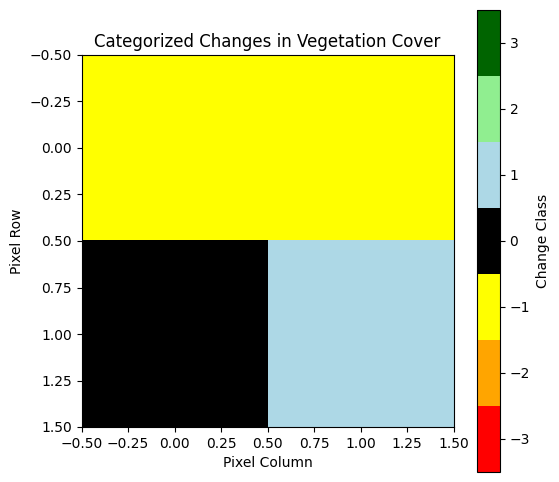

In [68]:
from matplotlib.colors import ListedColormap

def categorize_change(value):
    if 0 < value <= 0.33:
        return 1
    elif 0.33 < value <= 0.66:
        return 2
    elif 0.66 < value <= 1:
        return 3
    elif -0.33 <= value < 0:
        return -1
    elif -0.66 <= value < -0.33:
        return -2
    elif -1 <= value < -0.66:
        return -3
    else:
        return 0
    
# Custom colormap: black, yellow-orange-red for negatives, black, lightblue-green-dark green for positives
colors = ['red', 'orange', 'yellow', 'black', 'lightblue', 'lightgreen', 'darkgreen']
cmap = ListedColormap(colors)
bounds = [-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5]
norm = plt.Normalize(min(bounds), max(bounds))


# Setting the threshold
threshold = 0.111

# Calculating changes where either of the values is greater than the threshold
change_detection = np.where((array_2010 > threshold) | (array_2011 > threshold), array_2011 - array_2010, 0)

# Vectorizing the categorize_change function to apply it element-wise
categorize_change_vectorized = np.vectorize(categorize_change)

# Applying the categorization to the change_detection array
categorized_changes = categorize_change_vectorized(change_detection)

print(categorized_changes)

# Plotting
plt.figure(figsize=(6, 6))
plt.imshow(categorized_changes, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(ticks=np.arange(-3, 4), label='Change Class')
plt.title('Categorized Changes in Vegetation Cover')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.grid(False)
plt.show()